# Dimensionality Reduction using an Autoencoder in Python 
Welcome to this project. We will introduce the theory behind an autoencoder (AE), its uses, and its advantages over PCA, a common dimensionality reduction technique.


## Project Outline
[**Task 1**](#task1): Package Importing and Introduction to Project

[**Task 2**](#task2): Dataset Creation and Preprocessing

[**Task 3**](#task3): Create a Baseline Model with PCA

[**Task 4**](#task4): Autoencoder Introduction and Training

[**Task 5**](#task5): Reducing Dimensionality with AE

<a id='task1'></a>
# Task 1: Importing and Introduction

In [1]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, silhouette_score

In [3]:
cols = ['#1FC17B', '#78FECF', '#555B6E', '#CC998D', '#429EA6',
        '#153B50', '#8367C7', '#EE6352', '#C287E8', '#F0A6CA', 
        '#521945', '#361F27', '#828489', '#9AD2CB', '#EBD494', 
        '#53599A', '#80DED9', '#EF2D56', '#446DF6', '#AF929D']

<a id='task2'></a>
# Task 2: Dataset Creation and Preprocessing

In [4]:
# this is an artificial dataset we've created using schkit-learn makes distributions of data.
x,y=make_blobs(n_features=50,centers=20,n_samples=20000,#50 dimensions across 20 different clusters
               cluster_std=0.2,center_box=[-1,1],random_state=17)#center_box ensures the clusters lie in a particular interval.



In [5]:
x[0]

array([-0.24491985,  0.08099673, -0.36631058, -0.30356551,  0.4029225 ,
        0.65687067,  0.92734294,  0.15492068, -1.10501981,  1.2015462 ,
        0.09578114, -0.75648951, -0.03483697, -0.59523737,  0.02576486,
        0.53523807,  0.08089194, -0.26480015, -0.71277422,  0.07793643,
        0.10326661, -0.92311803, -0.18569531, -0.5761846 , -0.78765359,
       -0.83055169,  0.04446853, -0.26118528,  0.8337965 , -0.59227263,
        0.68834042,  0.17701281,  0.2732509 , -0.00538731,  0.92922794,
        0.62743183,  0.85424358,  0.80721711, -1.14219787,  0.28178435,
        0.55215801,  0.38500603,  0.19163107,  0.55960783,  0.72073584,
       -1.14520866,  1.09184982, -1.04337987,  1.24350139, -0.63786661])

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=17)

In [7]:
scaler=MinMaxScaler() 
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

<a id='task3'></a>
# Task 3: Baseline Model

In [8]:
#We will be using PCA
pca=PCA(n_components=2)
pca.fit(x_train)
res_pca=pca.transform(x_test)

In [9]:
pca.components_

array([[ 0.28268999,  0.24802659,  0.21015724, -0.09213903, -0.01605549,
         0.04923274,  0.23211519, -0.07820505,  0.25129739,  0.07520027,
        -0.21773417, -0.3244615 ,  0.00202971, -0.0696828 ,  0.07935258,
        -0.23375669,  0.07715876, -0.10579978,  0.08305395,  0.17447992,
         0.07504814,  0.06358363,  0.14438224, -0.12819549,  0.04825745,
         0.07825064, -0.11052841,  0.16570202, -0.07403747,  0.11330436,
        -0.10446723,  0.05585119, -0.06162079,  0.16446697,  0.22231354,
        -0.02163296,  0.05884609,  0.29272123, -0.03947516, -0.12701976,
        -0.05226791,  0.00761648, -0.0453671 ,  0.04439277, -0.15511981,
         0.01523315,  0.04553821,  0.15364411, -0.16580082, -0.04655398],
       [-0.02623038,  0.09999007, -0.11825983, -0.20785866, -0.02022821,
         0.17162116,  0.27161497, -0.08809733, -0.13823761,  0.01431545,
        -0.03082855, -0.30516742,  0.0575729 , -0.00186591, -0.24233763,
         0.13976819,  0.00298272,  0.0107755 , -0.

In [10]:
pca.explained_variance_

array([0.16978784, 0.15666202])

In [11]:
list(zip(pca.explained_variance_, pca.components_))

[(0.16978783566462072,
  array([ 0.28268999,  0.24802659,  0.21015724, -0.09213903, -0.01605549,
          0.04923274,  0.23211519, -0.07820505,  0.25129739,  0.07520027,
         -0.21773417, -0.3244615 ,  0.00202971, -0.0696828 ,  0.07935258,
         -0.23375669,  0.07715876, -0.10579978,  0.08305395,  0.17447992,
          0.07504814,  0.06358363,  0.14438224, -0.12819549,  0.04825745,
          0.07825064, -0.11052841,  0.16570202, -0.07403747,  0.11330436,
         -0.10446723,  0.05585119, -0.06162079,  0.16446697,  0.22231354,
         -0.02163296,  0.05884609,  0.29272123, -0.03947516, -0.12701976,
         -0.05226791,  0.00761648, -0.0453671 ,  0.04439277, -0.15511981,
          0.01523315,  0.04553821,  0.15364411, -0.16580082, -0.04655398])),
 (0.1566620237236995,
  array([-0.02623038,  0.09999007, -0.11825983, -0.20785866, -0.02022821,
          0.17162116,  0.27161497, -0.08809733, -0.13823761,  0.01431545,
         -0.03082855, -0.30516742,  0.0575729 , -0.00186591, -0.

In [12]:
res_pca.shape

(2000, 2)

Text(0.5, 1.0, 'PCA Results')

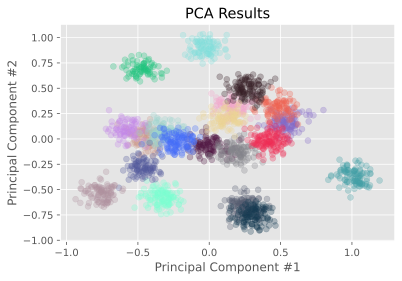

In [13]:
unique_labels=np.unique(y_test) #To loop over our different Clusters.
for index, unique_label in enumerate(unique_labels):
    x_data=res_pca[y_test==unique_label]  #Unique_label indexes our results based on the y_test values that equal the unique label.
    #We can index an array based on another array as long as theey are the same size.
    plt.scatter(x_data[:,0],x_data[:,1],alpha=0.3,c=cols[index])
    
plt.xlabel('Principal Component #1')
plt.ylabel("Principal Component #2")
plt.title("PCA Results")

### Given a dataset in high dimensional space, it will find the directions or vectors in our dataset with the highest variance. The first compponent will have the highest variance of our data and everything else will be projected on it.

<a id='task4'></a>
# Task 4: Autoencoder Theory and Training
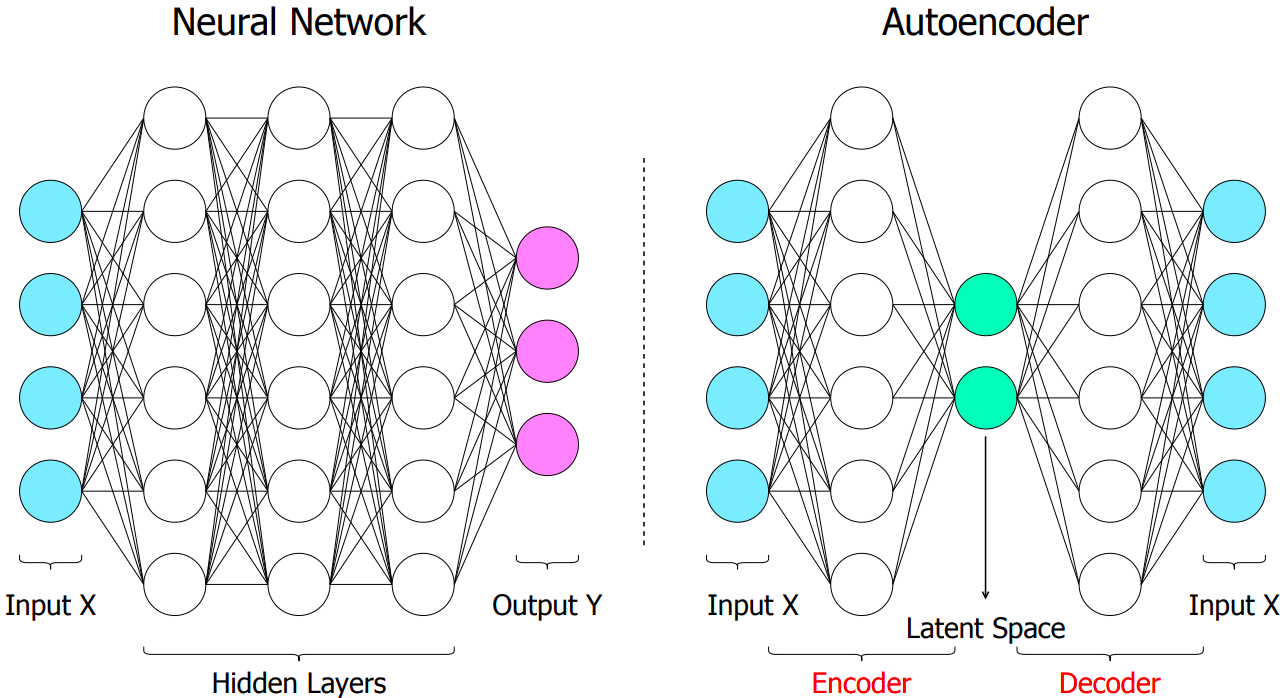

## A short synopsis of an Auto-encoder
Here we train the model to recreate the input. There is a space in between the Encoder and the Decoder called the Latent Space, where we reduce the dimensionality from the input to the output. We force the model to learn from a low-dimensional representation hence we are reducing dimenionality of the input data.   Encoder takes the input, and reduces the dimension to the latent space, the decode takes the latent space variables and decodes them back into the original input.it is a nuanced version of a neural network. 

In [14]:
autoencoder=MLPRegressor(alpha=1e-15,
                        hidden_layer_sizes=(50,100,50,2,50,100,50),random_state=1,max_iter=20000)
autoencoder.fit(x_train,x_train) # we can play with the hidden layers and random_state.

MLPRegressor(alpha=1e-15, hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50),
             max_iter=20000, random_state=1)

<a id='task5'></a>
# Task 5: Reducing Dimensionality with Encoder

In [15]:
W=autoencoder.coefs_
biases=autoencoder.intercepts_

In [16]:
for w in W:
    print(w.shape) 

(50, 50)
(50, 100)
(100, 50)
(50, 2)
(2, 50)
(50, 100)
(100, 50)
(50, 50)


This is the shape of our autoencoder. Here we only care about the encoder because it will be related to dimensionality reduction. Basically, the first four weights.

In [17]:
encoder_weights=W[0:4]
encoder_biases=biases[0:4]

### Now we are only going to build the encoder part of our Autoencoder, as we only require the place till the dimenstionality is reduced.

In [18]:
def encode(encoder_weights,encoder_biases,data): # loop over our enoder weight and biases
    res_ae=data
    for index ,(w,b) in enumerate(zip(encoder_weights,encoder_biases)):
        if  index+1==len(encoder_weights): # we do not apply relu in the last part of our function.
            res_ae=res_ae@w+b
        else:
            res_ae=np.maximum(0,res_ae@w+b) # applying activation along with relu.
    return res_ae

res_ae=encode(encoder_weights,encoder_biases,x_test)
        

In [19]:
res_ae.shape

(2000, 2)

## Comparing the Silhouette scores. 

#### Silhouette refers to a method of interpretation and validation of consistency within clusters of data. 
### <br> The closer the value of the score to 1, the better the cluster has been represented. 

In [22]:
silhouette_score(x_test,y_test)

0.6106327445141103

In [23]:
silhouette_score(res_pca,y_test)

0.3644402652367811

We can see that the score for PCA and they are very less.

In [24]:
silhouette_score(res_ae,y_test)

0.8020960810534309

In terms of the clustering, the autoencoder has had a better representation of the clusters than that of PCA.

### Lets visualize the PCA results and the Encoder Function.

Text(0.5, 1.0, 'PCA Results')

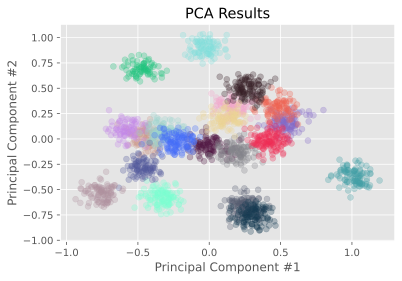

In [20]:
unique_labels=np.unique(y_test) #To loop over our different Clusters.
for index, unique_label in enumerate(unique_labels):
    x_data=res_pca[y_test==unique_label]  #Unique_label indexes our results based on the y_test values that equal the unique label.
    #We can index an array based on another array as long as theey are the same size.
    plt.scatter(x_data[:,0],x_data[:,1],alpha=0.3,c=cols[index])
    
plt.xlabel('Principal Component #1')
plt.ylabel("Principal Component #2")
plt.title("PCA Results")

Text(0.5, 1.0, 'Autoencoder Results')

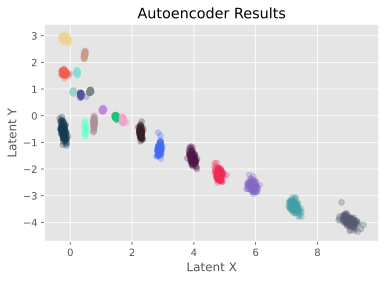

In [21]:
unique_labels=np.unique(y_test)
for index,unique_label in enumerate(unique_labels):
    latent_space=res_ae[y_test==unique_label]
    
    plt.scatter(latent_space[:,0],latent_space[:,1],alpha=0.3,c=cols[index])
    
plt.xlabel("Latent X")
plt.ylabel("Latent Y")
plt.title("Autoencoder Results")

## Here we can see that our clusters are much stronger when it comes to the autoencoder i.e they are independent and there is less interference amongst other clusters. Autoencoders have worked much well, hence we can see that even after compressing 50 dimensions, it was able to maintains the information thats relevant to the dataset, i.e the cluster identification of each point. there's no confusion and no point in the other cluster. In the PCA, the clusters haven't been well defined, as well as they overlap with each other hence there has certainly been some loss.